## First we define some functions that generate most of our data

In [2]:
import numpy as np

In [3]:
def generate_xs(num_rows, num_cols, num_classes, class_separation):
    
    # Function that sets the center of a class as a function of its label
    def loc_func(i):
        return i * class_separation
    
    partition = int(num_rows / num_classes) # each class will have this many samples
    mat = np.zeros((partition*num_classes, num_cols))
    for i in range(num_classes):
        for j in range(partition):
            mat[(i*partition) + j, :] = np.random.normal(loc=loc_func(i), scale = 1, size=num_cols)
    return mat

In [4]:
def generate_ys(num_rows, num_classes):
    # create a 1 dimensional ndarray like: [0,0,0,1,1,1] if M was 6 and c was 2
    partition = int(num_rows / num_classes)
    y = np.zeros(partition * num_classes)
    for i in range(num_classes):
        y[i*partition:i*partition+partition] = np.repeat(i, partition)
    return y

In [5]:
from svc2 import SVC # Our model
import sklearn.svm as skl # Scikit model
from sklearn.utils import shuffle
import time
import matplotlib.pyplot as plt

## Training Time vs Num Samples and Accuracy vs Num Samples

[100, 200, 300, 400]
Done 100 samples
Done 200 samples
Done 300 samples
Done 400 samples


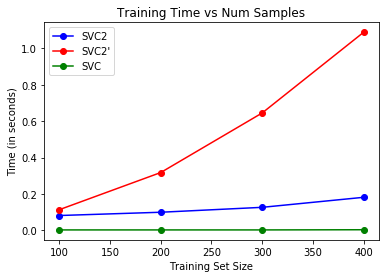

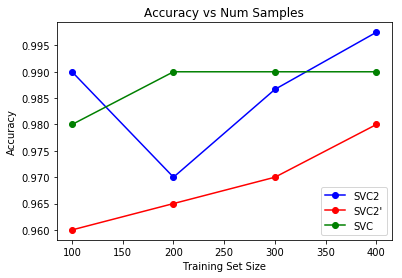

In [24]:
# TUNABLE PARAMETER FOR PROFESSOR: num_samples_list_size (use 5-10 for reasonable execution time)
num_samples_list_size = 21

# Creates the list [100, 200, 300, ....]
row_sizes = list(range(0, num_samples_list_size*100, 100))[1:]
print(row_sizes)

# Fix the number of dimensions, classes, and data separation
num_cols = 5
num_labels = 2
separation = 2

# Create the models we are testing
svc1 = SVC(num_processes2=5)
svc2 = SVC(num_processes2=1)
svc3 = skl.SVC(gamma='auto')

# Put them (and their names, accuracy, and time arrays) into a list so we can iterate over them
models = [(svc1, "SVC2", np.zeros(len(row_sizes)), np.zeros(len(row_sizes))),
(svc2, "SVC2'", np.zeros(len(row_sizes)), np.zeros(len(row_sizes))),
(svc3, "SVC", np.zeros(len(row_sizes)), np.zeros(len(row_sizes)))]

for i, num_rows in enumerate(row_sizes):
    # generate and shuffle data
    x_train, x_test = generate_xs(num_rows, num_cols, num_labels, separation), generate_xs(num_rows, num_cols, num_labels, separation)
    y_train, y_test = generate_ys(num_rows, num_labels), generate_ys(num_rows, num_labels)
    x_train, y_train = shuffle(x_train, y_train)
    
    # train each model, record the time it takes, and the accuracy, store in models array
    for j, (model, name, _, _) in enumerate(models):
        t = time.time()
        model.fit(x_train, y_train)
        t = round(time.time() - t, 3)
        yhat = model.predict(x_test)
        acc = sum(yhat == y_test) / num_rows
        models[j][2][i] = acc
        models[j][3][i] = t
    print("Done " + str(num_rows) + " samples")


# Plot either the time or accuracy array over the num_samples
# data_idx is the index into models[i] of the data array we want
def plot_2d(data_idx, title, ylabel):
    colors = ["bo-", "ro-", "go-"]
    labels = [model[1] for model in models]
    for i in range(len(models)):
        x1 = np.asarray(row_sizes)
        x2 = models[i][data_idx]
        plt.plot(x1, x2, colors[i], label=labels[i])
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Training Set Size')
    plt.legend()
    plt.show()

# Call the plot function for time and accuracy data, and corresponding plot metadata
plot_2d(3, "Training Time vs Num Samples", "Time (in seconds)")
plot_2d(2, "Accuracy vs Num Samples", "Accuracy")

## Nonlinear Data (make_circles) & Performance of different Kernel Functions

plotting circles...


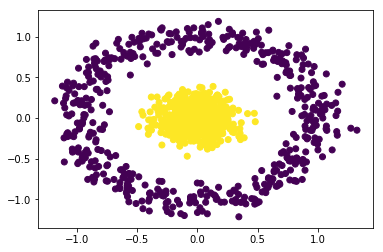

linearkernel done...
rbfkernel done...
sigmoidkernel done...
polykernel done...


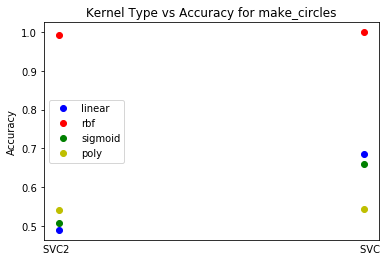

In [13]:
from sklearn.datasets.samples_generator import make_circles
num_samples = 1000

# Create the circles dataset
tr_x, tr_y = make_circles(num_samples, factor=0.2, noise=0.1)
te_x, te_y = make_circles(num_samples, factor=0.2, noise=0.1)

print("plotting circles...")
plt.scatter(tr_x[:, 0], tr_x[:, 1], c=tr_y)
plt.show()

# Create models
models = [SVC(), skl.SVC()]

kernels = ["linear", "rbf", "sigmoid", "poly"]
kern_acc = np.zeros((len(kernels), 2)) # the accuracies for each kernel function for each model

# iterate over kernels
for idx, kernel in enumerate(kernels):
    models = [SVC(kernel=kernel), skl.SVC(kernel=kernel, gamma='auto')]
    for j, model in enumerate(models):
    # fit and predict w/ current kernel for this model
        model.fit(tr_x, tr_y)
        preds = model.predict(te_x)
        acc = sum(preds == te_y) / num_samples
        kern_acc[idx, j] = acc
    print(kernel + " kernel done...")
        
colors = ['bo', 'ro', 'go', 'yo']
arr_ = np.array([1, 2])
for i in range(len(kernels)):
    plt.plot(arr_, kern_acc[i, :], colors[i], label=kernels[i])
plt.title("Kernel Type vs Accuracy for make_circles")
plt.ylabel("Accuracy")
plt.xticks([])
plt.xlabel("SVC2                                                                                             SVC")
plt.legend()
plt.show()

## Dimensions vs Accuracy

Done w/ dimension 5/150
Done w/ dimension 10/150
Done w/ dimension 15/150
Done w/ dimension 20/150
Done w/ dimension 25/150
Done w/ dimension 30/150
Done w/ dimension 35/150
Done w/ dimension 40/150
Done w/ dimension 45/150
Done w/ dimension 50/150
Done w/ dimension 55/150
Done w/ dimension 60/150
Done w/ dimension 65/150
Done w/ dimension 70/150
Done w/ dimension 75/150
Done w/ dimension 80/150
Done w/ dimension 85/150
Done w/ dimension 90/150
Done w/ dimension 95/150
Done w/ dimension 100/150
Done w/ dimension 105/150
Done w/ dimension 110/150
Done w/ dimension 115/150
Done w/ dimension 120/150
Done w/ dimension 125/150
Done w/ dimension 130/150
Done w/ dimension 135/150
Done w/ dimension 140/150
Done w/ dimension 145/150
Done w/ dimension 150/150


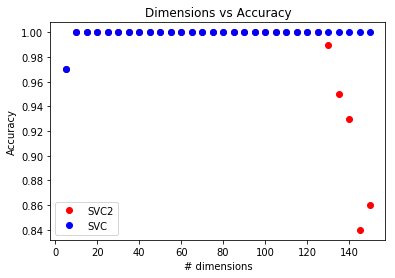

In [38]:
max_dimension = 150

# Creates the list [5, 10, 15, 20, ..., max_dimension]
dimensions = list(range(0, max_dimension + 5, 5))[1:]
num_samples = 100

# accuracies for each dimension for each model
results = np.zeros((len(dimensions), 2))
models = [SVC(max_iter=1000), skl.SVC(max_iter=1000, gamma='auto')]

for idx, dim in enumerate(dimensions):
    x_train, x_test = generate_xs(num_samples, dim, 2, 2), generate_xs(num_samples, dim, 2, 2)
    y_train, y_test = generate_ys(num_samples, 2), generate_ys(num_samples, 2)
    x_train, y_train = shuffle(x_train, y_train)
    for j, model in enumerate(models):
        model.fit(x_train, y_train)
        preds = model.predict(x_test)
        acc = sum(preds == y_test) / num_samples
        results[idx, j] = acc
    print("Done w/ dimension " + str(dim) + "/" + str(max_dimension))

plt.plot(np.asarray(dimensions), results[:, 0], 'ro', label = "SVC2")
plt.plot(np.asarray(dimensions), results[:, 1], 'bo', label = "SVC")
plt.title("Dimensions vs Accuracy")
plt.xlabel("# dimensions")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
        
        

## Data Separation vs Accuracy

Separation 0.0 done.
Separation 0.05 done.
Separation 0.1 done.
Separation 0.15 done.
Separation 0.2 done.
Separation 0.25 done.
Separation 0.3 done.
Separation 0.35 done.
Separation 0.4 done.
Separation 0.45 done.
Separation 0.5 done.
Separation 0.55 done.
Separation 0.6 done.
Separation 0.65 done.
Separation 0.7 done.
Separation 0.75 done.
Separation 0.8 done.
Separation 0.85 done.
Separation 0.9 done.
Separation 0.95 done.
Separation 1.0 done.
Separation 1.05 done.
Separation 1.1 done.
Separation 1.15 done.
Separation 1.2 done.
Separation 1.25 done.
Separation 1.3 done.
Separation 1.35 done.
Separation 1.4 done.
Separation 1.45 done.
Separation 1.5 done.
Separation 1.55 done.
Separation 1.6 done.
Separation 1.65 done.
Separation 1.7 done.
Separation 1.75 done.
Separation 1.8 done.
Separation 1.85 done.
Separation 1.9 done.
Separation 1.95 done.
Separation 2.0 done.
Separation 2.05 done.
Separation 2.1 done.
Separation 2.15 done.
Separation 2.2 done.
Separation 2.25 done.
Separation 

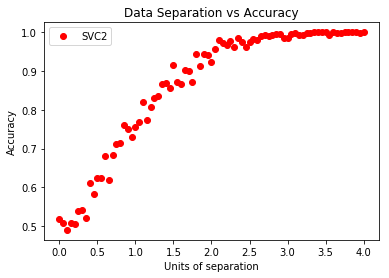

In [43]:
max_separation = 4

# Creates the list [0.0, 0.05, 0.1, 0.15, ... max_separation]
separations = [x/100 for x in list(range(0, max_separation*100 + 5, 5))]

# Accuracies for each separation
results = np.zeros(len(separations))

# fix these
num_samples = 400
num_dimensions = 3

for i, sep in enumerate(separations):
    x_train, x_test = generate_xs(num_samples, num_dimensions, 2, sep), generate_xs(num_samples, num_dimensions, 2, sep)
    y_train, y_test = generate_ys(num_samples, 2), generate_ys(num_samples, 2)
    x_train, y_train = shuffle(x_train, y_train)
    clf = SVC(max_iter=1000)
    clf.fit(x_train, y_train)
    preds = clf.predict(x_test)
    acc = sum(preds == y_test) / num_samples
    results[i] = acc
    print("Separation " + str(sep) + " done.")

plt.plot(np.asarray(separations), results, 'ro', label = "SVC2")
plt.title("Data Separation vs Accuracy")
plt.xlabel("Units of separation")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Number of Classes vs Accuracy and Time

done 2
done 3


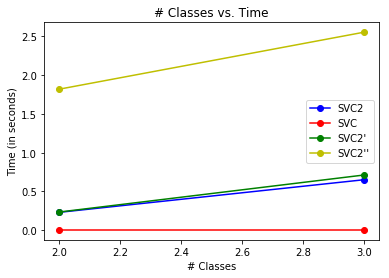

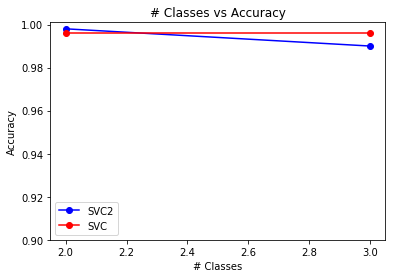

In [9]:
num_classes_list = list(range(2, 4))

# Keep the # of samples, # of dimensions fixed, and separation fixed
num_samples = 500
num_dims = 3
sep = 4

# Put the models we want to test in a list
models = [(SVC(num_processes1=4), "SVC2"), (skl.SVC(gamma="auto"), "SVC"), (SVC(num_processes1=1), "SVC2'"), (SVC(num_processes1=4, num_processes2 = 1), "SVC2''")]

accuracies = np.zeros((len(models), len(num_classes_list)))
times = np.zeros((len(models), len(num_classes_list)))

for i, num_classes in enumerate(num_classes_list):
    # generate data
    tr_x, te_x = generate_xs(num_samples, num_dims, num_classes, sep), generate_xs(num_samples, num_dims, num_classes, sep)
    tr_y, te_y = generate_ys(num_samples, num_classes), generate_ys(num_samples, num_classes)
    tr_x, tr_y = shuffle(tr_x, tr_y)
    for j, model in enumerate(models):
        t = time.time()
        model[0].fit(tr_x, tr_y)
        t = time.time() - t
        preds = model[0].predict(te_x)
        acc = sum(preds == te_y) / num_samples
        accuracies[j, i] = acc
        times[j, i] = round(t, 3)
    print("done " + str(num_classes))

def plot_(data_arr, title, ylabel):
    colors = ["bo-", "ro-", "go-", "yo-"]
    for i, model in enumerate(models):
        if (ylabel == "Accuracy" and i > 1):
            break
        plt.plot(np.asarray(num_classes_list), data_arr[i, :], colors[i], label=model[1])
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('# Classes')
    plt.legend()
    if (ylabel == "Accuracy"):
        plt.ylim((0.9,1.001))
    plt.show()


plot_(times, "# Classes vs. Time", "Time (in seconds)")
plot_(accuracies, "# Classes vs Accuracy", "Accuracy")

        
    